In [1]:
function EDO_pendulo_doble(t,variables,ω² = 1)
    # alpha = \theta1-\theta2
    l = 1 #0.98
    m = 1
    #g = 9.8
    #ω² = 0.1 #l/g
    α = variables[1]-variables[2]
    dθ_1 = 6/(m*l^2)*(2*variables[3]-3*variables[4]*cos(α))/(16-9*(cos(α))^2)
    dθ_2 = 6/(m*l^2)*(8*variables[4]-3*cos(α)*variables[3])/(16-9*(cos(α))^2)
    dp_1 = -1/2*(m*l^2)*(dθ_1*dθ_2*sin(α)+3*ω²*sin(variables[1]) )
    dp_2 = -1/2*(m*l^2)*(-dθ_1*dθ_2*sin(α) + ω²*sin(variables[2]))
    
    return[dθ_1, dθ_2, dp_1, dp_2]
end

function generador_fractal(θ_1, θ_2, t_0, t_f, δ, ϵ)
   #matriz de ceros donde se aneará si el angulo da vuelta o no
    valores = zeros(length(θ_1), length(θ_2))
    
    #Número de pasos de tiempo que se darán antes de inicial a corroborar las soluciones
    pasos = 18
    
    #ciclo para barrer en todos los ángulos
    for i in 1:length(θ_1)
        for j in 1:length(θ_2)
            #empezamos a descartar los ángulos que sabemos que no giraran
            if 3*cos(θ_1[i]) + cos(θ_2[j]) > 2
                valores[j,i] = t_f+3
            
            #para los valores que sabemos que van a girar
            else
                #Calculando la solución para primero pasos de tiempo
                t_1 = t_0
                solucion_t_1 = [θ_1[i], θ_2[j],0,0]
                
                t_2 = t_0
                solucion_t_2 = [θ_1[i], θ_2[j],0,0]
                
                
                for i in 1:pasos
                    t_1 = t_1 + δ
                    #obtenemos la solución del siguiente tiempo
                    k1_1 = EDO_pendulo_doble(t_1, solucion_t_1)
                    k2_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1 .+ 0.5*δ.*k1_1)
                    k3_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1.+ 0.5*δ.*k2_1 )
                    k4_1 = EDO_pendulo_doble(t_1 + δ, solucion_t_1.+ δ.*k2_1)
                    solucion_t_1 = solucion_t_1 .+ (δ/6.0).*(k1_1 .+ 2.0.*k2_1 .+ 2.0.*k3_1 .+ k4_1)
                    
                    t_2 = t_2 + δ
                    #obtenemos la solución del siguiente tiempo
                    k1_2 = EDO_pendulo_doble(t_2, solucion_t_2)
                    k2_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2 .+ 0.5*δ.*k1_2)
                    k3_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2.+ 0.5*δ.*k2_2)
                    k4_2 = EDO_pendulo_doble(t_2 + δ, solucion_t_2.+ δ.*k2_2)
                    solucion_t_2 = solucion_t_2 .+ (δ/6.0).*(k1_2 .+ 2.0.*k2_2 .+ 2.0.*k3_2 .+ k4_2)
                end 
                

                #buscamos el elemento de la solución tal que este alrededor de una vecindad epsilon de π
                while abs(abs(solucion_t_1[1])-π) > ϵ #
                    t_1 = t_1 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_1 = EDO_pendulo_doble(t_1, solucion_t_1)
                    k2_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1 .+ 0.5*δ.*k1_1)
                    k3_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1.+ 0.5*δ.*k2_1 )
                    k4_1 = EDO_pendulo_doble(t_1 + δ, solucion_t_1.+ δ.*k2_1)
                    solucion_t_1 = solucion_t_1 .+ (δ/6.0).*(k1_1 .+ 2.0.*k2_1 .+ 2.0.*k3_1 .+ k4_1)
                    if t_1 > t_f
                        break
                    end
                end
                
                
                
                while abs(abs(solucion_t_2[2])-π) > ϵ 
                    t_2 = t_2 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_2 = EDO_pendulo_doble(t_2, solucion_t_2)
                    k2_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2 .+ 0.5*δ.*k1_2)
                    k3_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2.+ 0.5*δ.*k2_2)
                    k4_2 = EDO_pendulo_doble(t_2 + δ, solucion_t_2.+ δ.*k2_2)
                    solucion_t_2 = solucion_t_2 .+ (δ/6.0).*(k1_2 .+ 2.0.*k2_2 .+ 2.0.*k3_2 .+ k4_2)
                    if t_2 > t_f
                        break
                    end
                end
                
                    
                if abs(abs(solucion_t_1[1])-π) < ϵ || abs(abs(solucion_t_2[2])-π) < ϵ  
                    valores[j,i] = minimum([t_1,t_2])
                end
                
            end
        end
    end
    return valores
    
end

generador_fractal (generic function with 1 method)

In [ ]:
#con estos parametros se obtienen orillas finas
θ1 = collect(0:0.005:π)
θ2 = collect(0:0.005:π)
@time begin
datos = generador_fractal(θ1, θ2, 0, 100, 0.001, 0.002)
end
using Plots
heatmap(datos)

In [ ]:
#con estos parametros se obtienen orillas finas
#esto se uso para el conjunto
θ1 = collect(0.8:0.0001:1.4)
θ2 = collect(1.7:0.0001:2.3)
@time begin
datos = generador_fractal(θ1, θ2, 0, 500, 0.005, 0.05)
end
using Plots
heatmap(datos)

In [ ]:
using CSV, DataFrames
CSV.write("conjunto_1.csv", DataFrame(datos), header= false)

In [ ]:
datos_1 = Matrix( CSV.read("conjunto_1.csv", DataFrame))
#ahora vamos a reescalar los datos para que se vean mejor el fractal
datos_1 = copy(datos_1)
for i in 1:length(datos_1) 
    if 0 < datos_1[i] <= 10
        datos_1[i] = 0
    elseif 10 < datos_1[i] <= 100
        datos_1[i] = 0.5
    elseif 100 <datos_1[i] <= 1000
        datos_1[i] = 1
    elseif datos_1[i]>1000
        datos_1[i] = 1.5
    else #elseif datos_1[i] ==0
        datos_1[i] = 1.5
    end
end
heatmap(datos_1)

In [1]:
using CSV, 
heatmap(Matrix( CSV.read("conjunto_1.csv", DataFrame)))

LoadError: UndefVarError: CSV not defined

In [ ]:
#con estos parametros se obtienen orillas finas
θ1 = collect(-π :0.005:0)
θ2 = collect(0:0.005:π)
@time begin
datos = generador_fractal(θ1, θ2, 0, 1000, 0.01, 0.02)
end
using Plots
heatmap(datos)
#para t = 01047.359440 

In [ ]:
datos1 = Matrix( CSV.read("I_definitivo.csv", DataFrame))
heatmap(datos1)
#37773.159195 seconds (189.52 G allocations: 19.305 TiB, 11.59% gc time)


In [ ]:
using CSV, DataFrames
CSV.write("I_definitivo.csv", DataFrame(datos), header = false)

In [10]:
#θ1 = collect(0:0.005:π)
#θ2 = collect(0:0.005:π)
#@time begin
#datos = generador_fractal(θ1, θ2, 0, 1000.01, 0.01, 0.08)
#end
#heatmap(datos)
#Para los datos de la segunda sección se tardó
#14127.108009  14127.108009 seconds (174.77 G allocations: 15.259 TiB, 8.29% gc time, 0.01% compilation time)
#Para los de la primera sección 
#27283.528669 seconds (187.47 G allocations: 16.368 TiB, 8.77% gc time, 0.00% compilation time)

using Plots, DataFrames, CSV

# Importando los datos

#datos1 = Matrix( CSV.read("I.csv", DataFrame))
datos2 = Matrix( CSV.read("II_(wpi-8).csv", DataFrame) )
#datos1_1 = Matrix( CSV.read("I_orilla.csv", DataFrame) )#esto no lo use
#datos2_1 = Matrix( CSV.read("II_orilla.csv", DataFrame) );#esto tampoco
datos1 = Matrix( CSV.read("I_(wpi-8).csv", DataFrame));

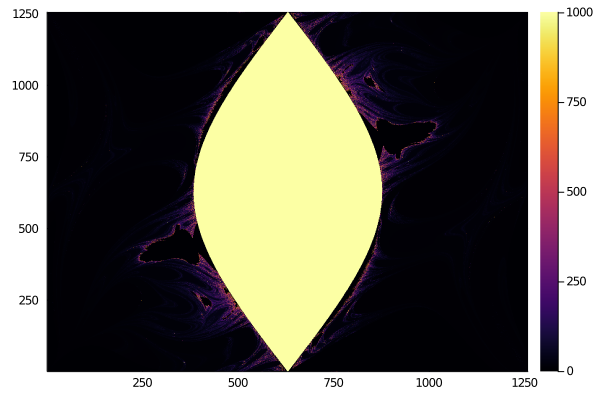

In [11]:
cuarto_cuadrante = zeros(628,629)
tercer_cuadrante = zeros(628,629)
datos_1 = datos1
datos_2 = datos2
for i in 0:length(datos_1)-1
    tercer_cuadrante[i+1] = datos_2[end-i]
end

for i in 0:length(datos_2)-1
    cuarto_cuadrante[i+1] = datos_1[end-i]
end

#unimos en dos trozos los cuatro cuadrantes
tercero_cuarto = hcat(cuarto_cuadrante , tercer_cuadrante)
primero_segundo = hcat(datos_2,datos_1 )

#unimos todo el fractal
fractal = vcat(tercero_cuarto, primero_segundo)
heatmap(fractal)

In [30]:
fractal = Matrix(CSV.read("fractal_w(pi-8).csv", DataFrame))
fracta_replica = Matrix(CSV.read("fractal_definitivo.csv", DataFrame));

for i in 1:length(fractal[1,:])
    for j in 1:length(fractal[:,1])
        if fractal[j,i] > 1000 
            fractal[j,i] = 0 
        end
    end
end
for i in 1:length(fracta_replica[1,:])
    for j in 1:length(fracta_replica[:,1])
        if fracta_replica[j,i] > 1000 
            fracta_replica[j,i] = 0 
        end
    end
end

In [41]:
CSV.write("diferencia_fractales_abs.csv", DataFrame(diferencia), header = false)

"diferencia_fractales_abs.csv"

In [38]:
diferencia =abs.( fractal.-fracta_replica) 

1255×1258 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0    0.0   0.0   …   0.0    0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0    0.0   0.0       0.0    0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0    0.0   0.0       0.0    0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.03   0.02  0.02      0.35  23.26  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.09   0.05  0.03      0.35   0.35  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.21   0.08  0.06  …   0.35   0.35  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.09   0.16  0.08      0.34   0.35  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.05   0.13  0.13     14.32   0.35  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.04   0.09  0.22     19.39   0.35  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.03   0.07  0.12      0.34  27.1   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.03   0.06  0.09  …   0.34   0.34  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.03   0.05  0.08      0.34   0.34  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.02   0.04  0.06      0.3

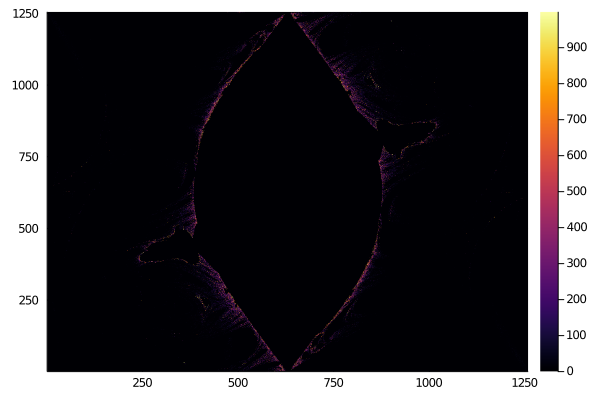

In [42]:
heatmap(diferencia)

In [43]:
minimum(diferencia)

0.0

In [ ]:
cuarto_cuadrante = zeros(628,629)
tercer_cuadrante = zeros(628,629)

for i in 0:length(datos_1)-1
    tercer_cuadrante[i+1] = datos_2[end-i]
end

for i in 0:length(datos_2)-1
    cuarto_cuadrante[i+1] = datos_1[end-i]
end

#unimos en dos trozos los cuatro cuadrantes
tercero_cuarto = hcat(cuarto_cuadrante , tercer_cuadrante)
primero_segundo = hcat(datos_2,datos_1 )

#unimos todo el fractal
fractal = vcat(tercero_cuarto, primero_segundo)
heatmap(fractal)

In [ ]:
datos3 = Matrix( CSV.read("Fractal_orillas_raras.csv", DataFrame));
heatmap(datos3)

In [ ]:
orilla_I = Matrix(CSV.read("I_orilla_fina.csv", DataFrame) );
#ahora vamos a reescalar los datos para que se vean mejor el fractal
datos_1 = copy(datos1)
for i in 1:length(datos_1) 
    if 0 < datos_1[i] < 10
        datos_1[i] = 0.3
    elseif 10 < datos_1[i] < 100
        datos_1[i] = 0.5
    elseif 100 <datos_1[i] < 1000
        datos_1[i] = 1
    elseif datos_1[i]>1000
        datos_1[i] = 1.5
    else #elseif datos_1[i] ==0
        datos_1[i] = 1.5
    end
end
heatmap(datos_1)

In [ ]:
datos_1 = copy(datos1)
for i in 1:length(datos_1) 
    if 0 < datos_1[i] < 10
        datos_1[i] = 0.3
    elseif 10 < datos_1[i] < 100
        datos_1[i] = 0.5
    elseif 100 <datos_1[i] < 1000
        datos_1[i] = 1
    elseif datos_1[i]>1000
        datos_1[i] = 1.5
    else #elseif datos_1[i] ==0
        datos_1[i] = 1.5
    end
end
heatmap(datos_1)